In [1]:
from __future__ import print_function, division
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

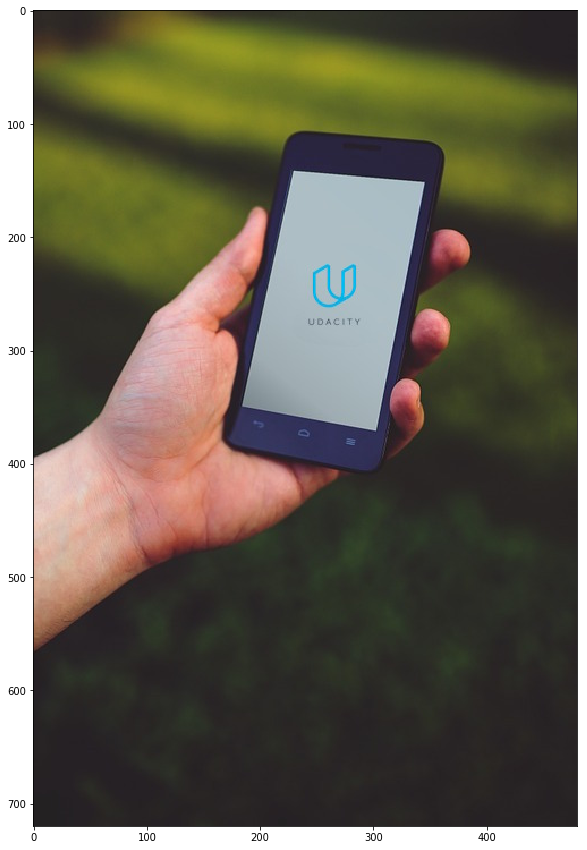

In [2]:
image = cv2.imread('../data/1_2/images/phone.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15, 15))
plt.imshow(image)

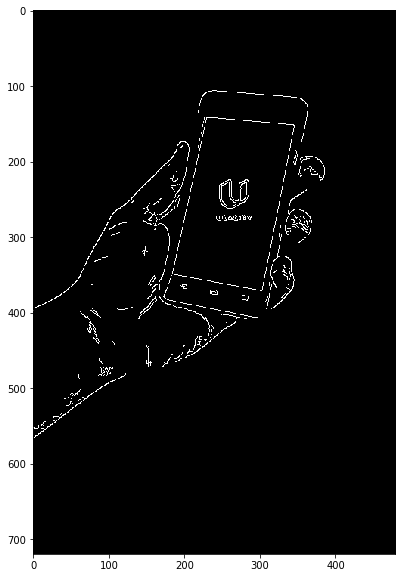

In [3]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

low_threshold = 50
high_threshold = 100
edges = cv2.Canny(gray, low_threshold, high_threshold)
plt.figure(figsize=(10, 10))
plt.imshow(edges, cmap='gray')

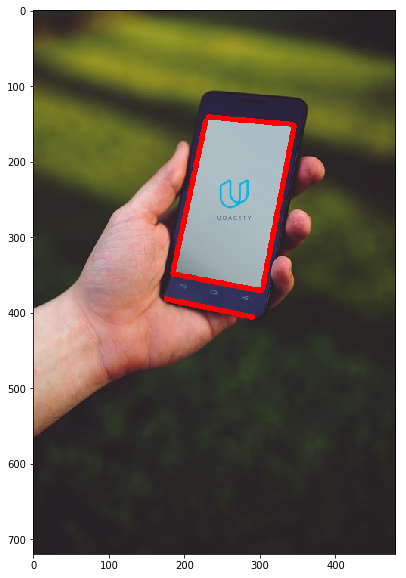

In [4]:
rho = 1
theta = np.pi / 180
threshold = 80 #至少60条hough线相交才能算一个边界。
min_line_length = 105
max_line_gap = 5

line_image = np.copy(image)
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                       min_line_length, max_line_gap)
for line in lines:
    for x1, y1, x2, y2 in line:
        cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 5)
plt.figure(figsize=(10, 10))
plt.imshow(line_image)

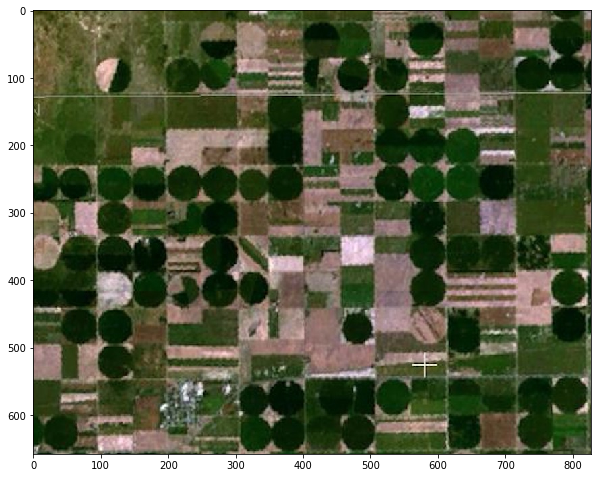

In [7]:
image = cv2.imread('../data/1_2/images/round_farms.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 10))
plt.imshow(image)


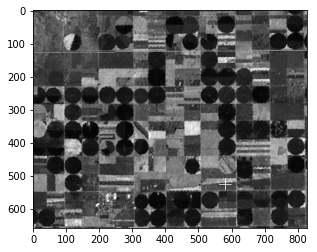

In [8]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
gray_blur = cv2.GaussianBlur(gray, (3, 3), 0)
plt.imshow(gray_blur, cmap='gray')


(1, 106, 3)


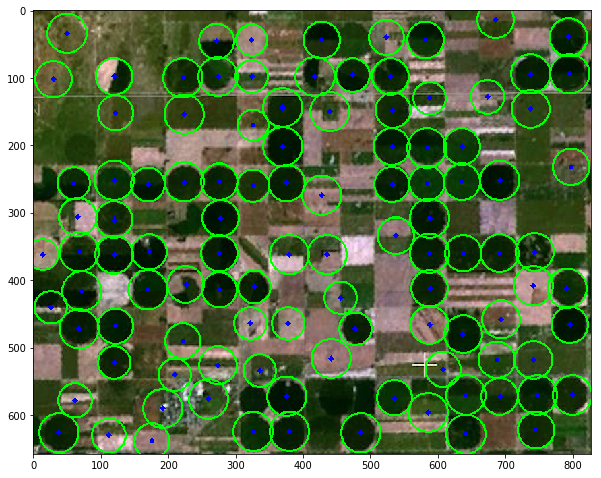

In [27]:
circles_im = np.copy(image)
'''
minDist:圆和圆之间的最小间距
param1:Canny检测的上阈值
param2:threshold for circle detection,a smaller value --> more circles will be detected
min/maxRadius:圆的最小半径和最大半径
'''
circles = cv2.HoughCircles(
    gray_blur, cv2.HOUGH_GRADIENT, 1,
    minDist=50, 
    param1=70, 
    param2=11,
    minRadius=22, 
    maxRadius=30)
circles = np.uint16(np.around(circles))

print(circles.shape)
for i in circles[0, :]:
    cv2.circle(circles_im, (i[0], i[1]), i[2], (0, 255, 0), 2) #圆周
    cv2.circle(circles_im, (i[0], i[1]), 2, (0, 0, 255), 3) #圆点
plt.figure(figsize=(10, 10))
plt.imshow(circles_im)